# HomeWork 2 - AlexNet Style Model with CIFAR10 dataset
### Submitted by Jocelyn Prince

### Use and AlexNet style architecture, with less kernels and neurons

### 4 blocks of 
1. Conv2d
2. Pooling
3. Batch Norm, 

then Flatten and 2 layers of Dense

# 0. Import Libraries

In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [0]:
import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
import itertools

# 1. Import CIFAR10 Dataset from Keras

In [0]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

# 2. Train / Test split - already done by keras. just print the shape

In [0]:
print("X_train: " + str(X_train.shape) + str(type(X_train)))
print("X_test: "+ str(X_test.shape))
print("y_train: "+ str(y_train.shape))
print("y_test: "+ str(y_test.shape))

X_train: (50000, 32, 32, 3)<class 'numpy.ndarray'>
X_test: (10000, 32, 32, 3)
y_train: (50000, 1)
y_test: (10000, 1)


# 3. Explore Data

Dataset of 50,000 32x32 color training images, labeled over 10 categories, and 10,000 test images.

Airplane
Automobile
Bird
Cat
Deer
Dog
Frog
Horse
Ship
Truck

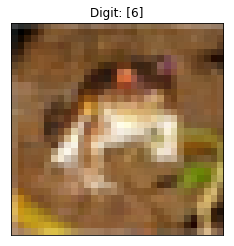

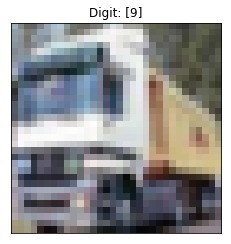

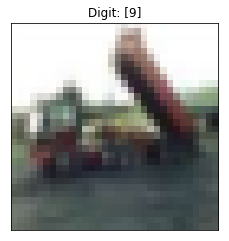

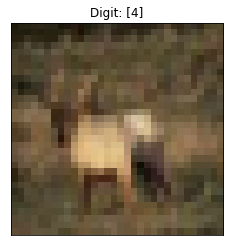

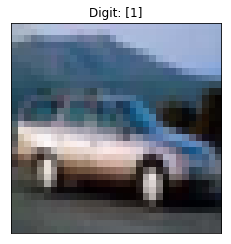

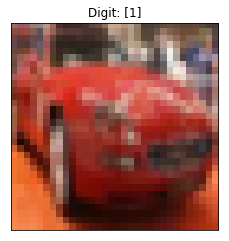

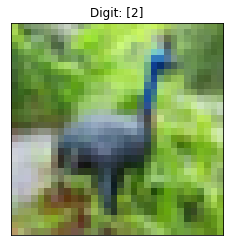

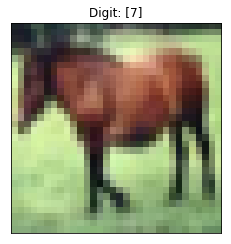

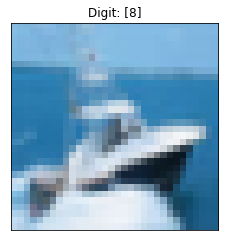

In [0]:
for i in range(9):
  plt.figure(figsize = (10,10))
  plt.subplot(3, 3, i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], 
             interpolation='none')
  plt.title('Digit: {}'.format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

# 4. Prepare Input Data

In [0]:
X_train = X_train.reshape(-1, 32, 32, 3)

In [0]:
print(X_train.shape)

(50000, 32, 32, 3)


In [0]:
y_train = keras.utils.to_categorical(y_train)

In [0]:
y_test = keras.utils.to_categorical(y_test)

# 5. Create CNN Model

Description of Alexnet from Géron's book:
Block 1
Conv: 96 maps 11x11, Stride 4, valid
Maxpooling 3x3, Stride 2, valid 

Block 2
Conv: 256 maps 5 x 5, Stride 1, same
Maxpooling 3x3, Stride 2, valid 

Block 3
Conv: 384 maps 3 x 3, Stride 1, same
Maxpooling: None

Block 4
Conv: 384 maps 3 x 3, Stride 1, same
Maxpooling: None

In [0]:
inputs = keras.Input(shape=(32,32,3))
# Block 1
x=layers.Conv2D(filters=50, kernel_size=3, strides=(1, 1), padding='same', activation='relu', kernel_initializer='glorot_uniform')(inputs)
x=layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='valid')(x)
x=layers.BatchNormalization()(x)
# Block 2
x=layers.Conv2D(filters=70, kernel_size=3, strides=(1, 1), padding='same', activation='relu', kernel_initializer='glorot_uniform')(x)
x=layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid')(x)
x=layers.BatchNormalization()(x)
# Block 3
x=layers.Conv2D(filters=100, kernel_size=3, strides=(1, 1), padding='same', activation='relu', kernel_initializer='glorot_uniform')(x)
x=layers.MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid')(x)
x=layers.BatchNormalization()(x)
# Block 4
x=layers.Conv2D(filters=50, kernel_size=3, strides=(1, 1), padding='same', activation='relu', kernel_initializer='glorot_uniform')(x)
x=layers.MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid')(x)
x=layers.BatchNormalization()(x)
# FC
x=layers.Flatten()(x)
# x=layers.Dropout(0.3)(x)
x=layers.Dense(64, activation='relu', kernel_initializer='glorot_uniform')(x)
# x=layers.Dropout(0.3)(x)
x=layers.Dense(64, activation='relu', kernel_initializer='glorot_uniform')(x)
# x=layers.Dropout(0.3)(x)
output=layers.Dense(10, activation='softmax')(x)

In [0]:
model = keras.Model(inputs, output)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
model.summary()

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 32, 32, 50)        1400      
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 16, 16, 50)        0         
_________________________________________________________________
batch_normalization_32 (Batc (None, 16, 16, 50)        200       
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 16, 16, 70)        31570     
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 8, 8, 70)          0         
_________________________________________________________________
batch_normalization_33 (Batc (None, 8, 8, 70)          280 

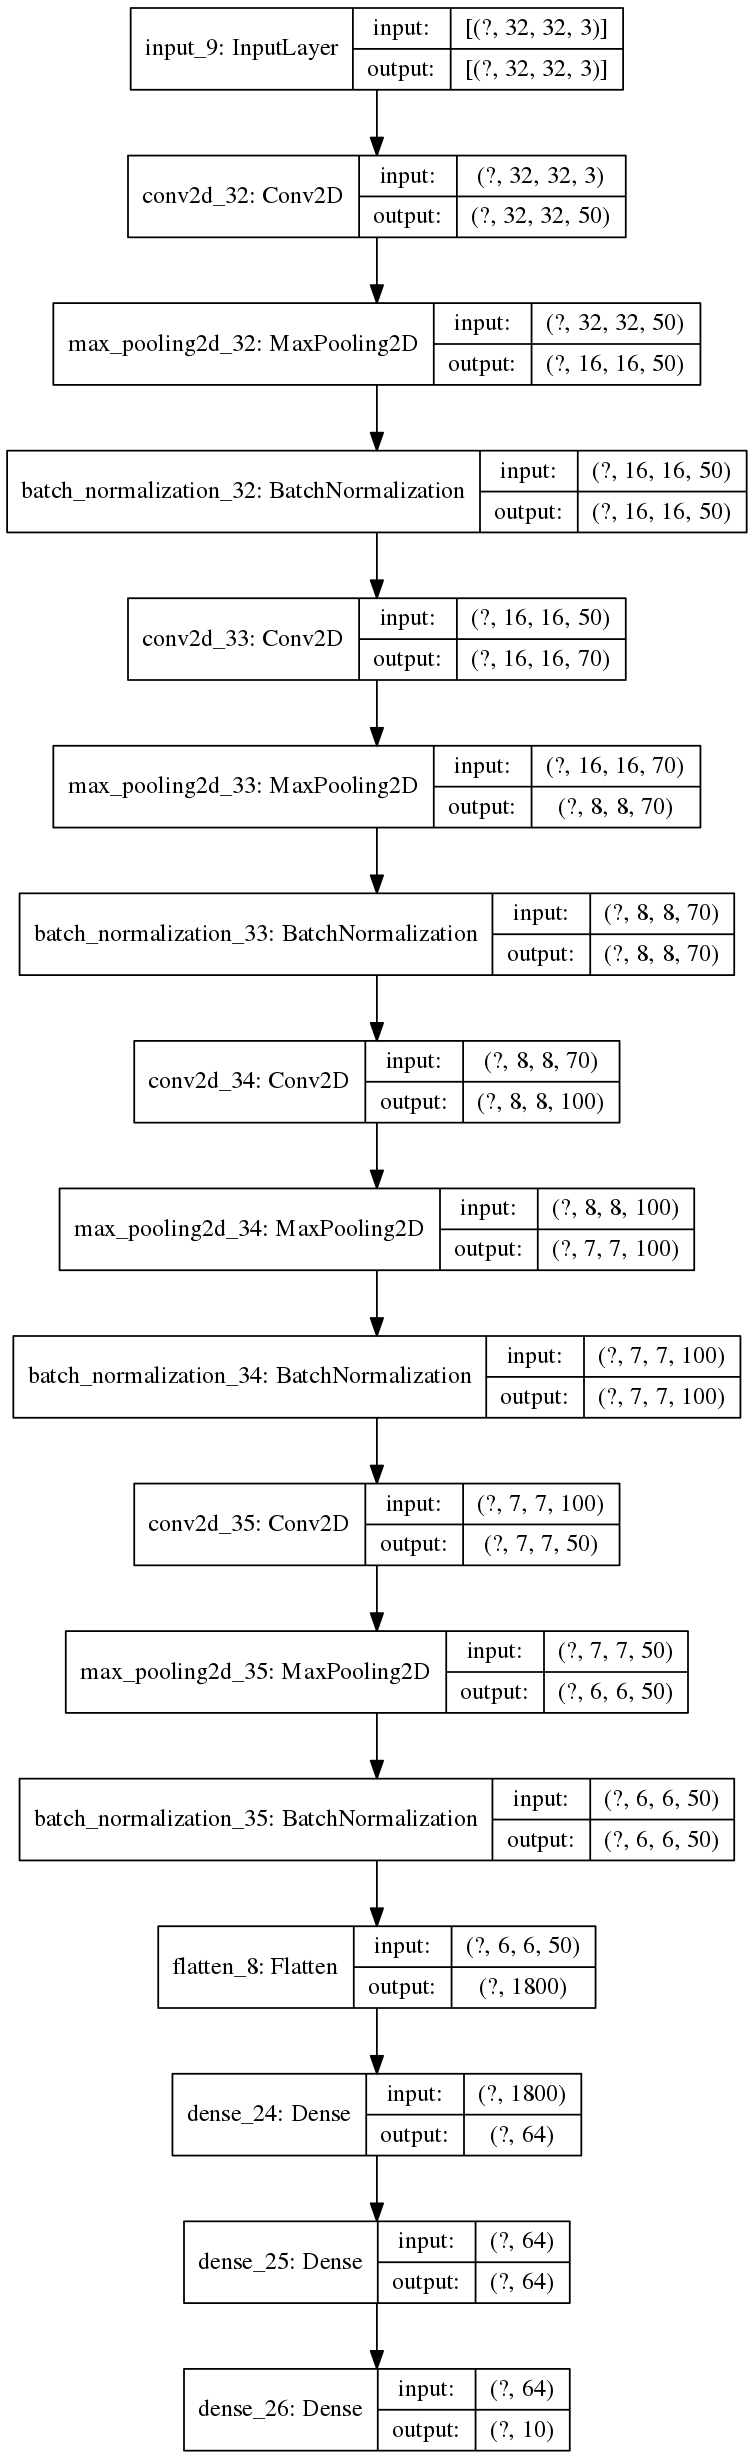

In [0]:
keras.utils.plot_model(model, to_file='model.png',show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=False, dpi=128)

# 6. Execute CNN Model

In [0]:
callbacks = [
  tf.keras.callbacks.EarlyStopping(patience=5, monitor='val_loss'),
  tf.keras.callbacks.TensorBoard(log_dir='./logs')
]

In [0]:
t1 = time.time()
hist = model.fit(X_train, 
                 y_train, 
                 epochs=40, 
                 batch_size=32, 
                 # callbacks=callbacks, 
                 # validation_split=0.1, 
                 verbose = 1)
t2 = time.time()

Train on 50000 samples
Epoch 1/40
50000/50000 [==============================] - 10s 204us/sample - loss: 1.2970 - accuracy: 0.5374
Epoch 2/40
50000/50000 [==============================] - 9s 187us/sample - loss: 0.8855 - accuracy: 0.6890
Epoch 3/40
50000/50000 [==============================] - 9s 186us/sample - loss: 0.7164 - accuracy: 0.7481
Epoch 4/40
50000/50000 [==============================] - 9s 186us/sample - loss: 0.6063 - accuracy: 0.7897
Epoch 5/40
50000/50000 [==============================] - 9s 187us/sample - loss: 0.5242 - accuracy: 0.8157
Epoch 6/40
50000/50000 [==============================] - 9s 187us/sample - loss: 0.4536 - accuracy: 0.8423
Epoch 7/40
50000/50000 [==============================] - 9s 188us/sample - loss: 0.3993 - accuracy: 0.8609
Epoch 8/40
50000/50000 [==============================] - 9s 187us/sample - loss: 0.3500 - accuracy: 0.8784
Epoch 9/40
50000/50000 [==============================] - 9s 187us/sample - loss: 0.3038 - accuracy: 0.8940
Epoc

In [0]:
print("Execution time: {0:5.1f} (sec) for{1:3.0f} epochs".format(t2 - t1, len(hist.epoch)))

Execution time: 376.0 (sec) for 40 epochs


# 7. Visualize the history of your training

<function matplotlib.pyplot.show(*args, **kw)>

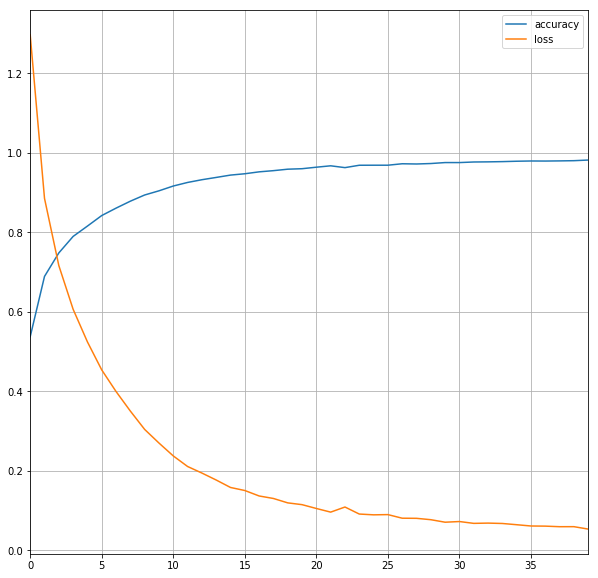

In [0]:
pd.DataFrame(hist.history).plot(figsize=(10,10))
plt.grid(True)
plt.show

# 8. Evaluate the CNN Model

In [0]:
accuracy_test = model.evaluate(X_test, y_test, verbose=2)
print(accuracy_test)

10000/1 - 1s - loss: 1.1969 - accuracy: 0.7828
[1.3265275215625763, 0.7828]


In [0]:
# Transform INT to FLOAT32
X_new = tf.cast(X_train[:16], tf.float32)

In [0]:
predictions = model.predict(X_new, batch_size=None, verbose=0)
print(predictions.round(1))

[[0.  0.  0.  0.4 0.  0.  0.6 0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  1. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  1. ]
 [0.  0.  0.  0.  1.  0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  1.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  1.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  1.  0. ]
 [0.  0.  0.  0.9 0.1 0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  1.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  1.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  1.  0.  0. ]
 [0.  0.  1.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  1. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.7 0.3]]


In [0]:
y_train[:16]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

# 9. Print Confusion Matrix

In [0]:
def plot_confusion_matrix(cm, 
                          classes, 
                          normalize=False,
                          title='Confusion matrix', 
                          cmap=plt.cm.Blues):
# This function prints and plots the confusion matrix. Normalization can be applied by setting `normalize=True`

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        # print("Normalized confusion matrix") # print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap) 
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes)) 
    plt.xticks(tick_marks, classes, rotation=45) 
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), 
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        plt.tight_layout() 
        plt.ylabel('True label') 
        plt.xlabel('Predicted label')

In [0]:
y_test_rounded = np.argmax(y_test, axis=1)
y_train_rounded = np.argmax(y_train, axis=1)

In [0]:
X_train = tf.cast(X_train, tf.float32)

In [0]:
y_pred = model.predict(X_train)
y_pred_rounded = np.argmax(y_pred, axis=1)

In [0]:
cmResults = confusion_matrix(y_train_rounded, y_pred_rounded)
accuracy = accuracy_score(y_train_rounded, y_pred_rounded)

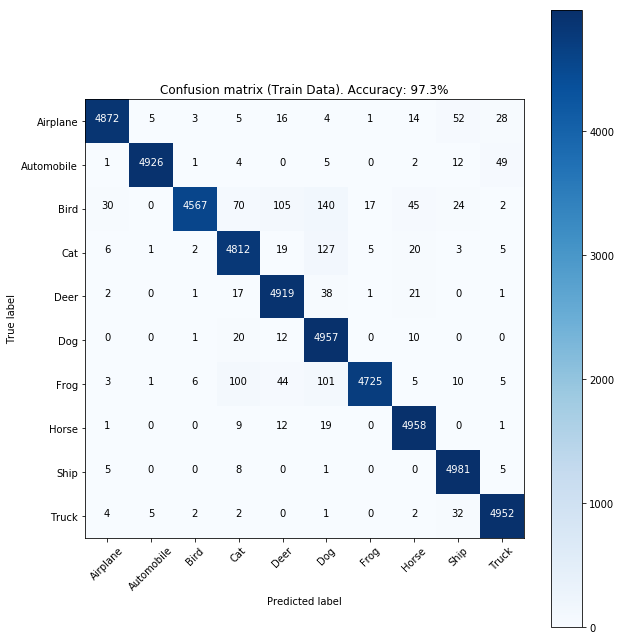

In [0]:
# Plot non-normalized confusion matrix 
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
plt.figure(figsize=(9,9));
plot_confusion_matrix(cmResults, classes=class_names, title='Confusion matrix (Train Data).' + " Accuracy: " + str(accuracy.round(3)*100) + "%" );

In [0]:
X_test = tf.cast(X_test, tf.float32)
y_pred = model.predict(X_test)
y_pred_rounded = np.argmax(y_pred, axis=1)
cmResults = confusion_matrix(y_test_rounded, y_pred_rounded)
accuracy = accuracy_score(y_test_rounded, y_pred_rounded)

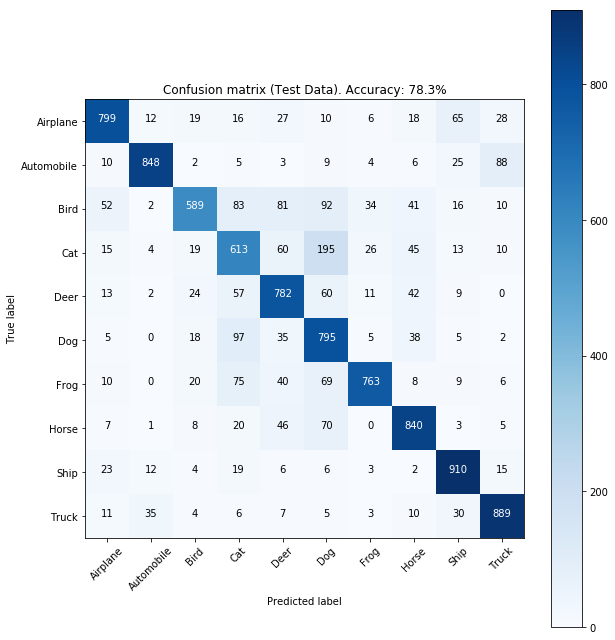

In [0]:
# Plot non-normalized confusion matrix 
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
plt.figure(figsize=(9,9));
plot_confusion_matrix(cmResults, classes=class_names, title='Confusion matrix (Test Data).' + " Accuracy: " + str(accuracy.round(3)*100) + "%" );